## 调库

In [31]:
from sklearn.datasets import load_iris
import seaborn as sns
from pandas import plotting
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

## 观察数据

In [32]:
data = load_iris() 
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Species'] = data.target
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 绘图观察变量之间的关系

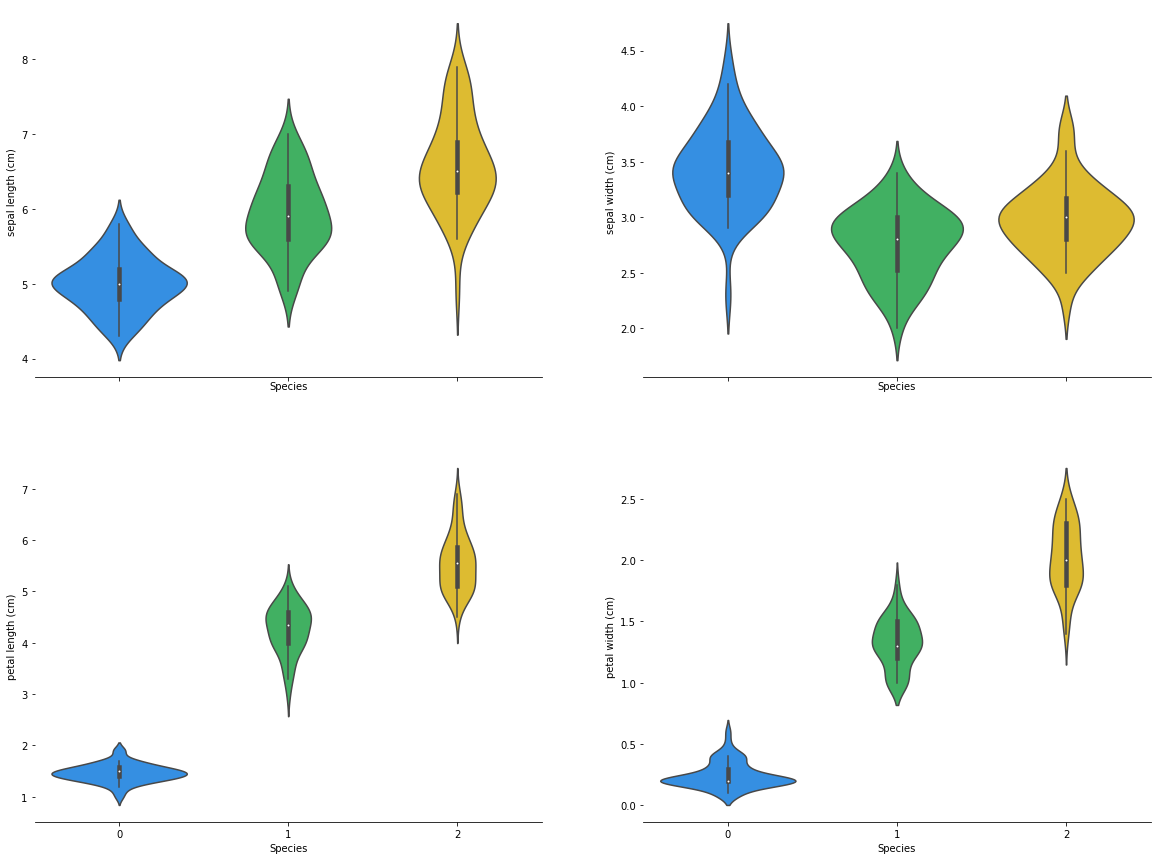

In [33]:
import matplotlib.pyplot as plt
antV = ['#1890FF', '#2FC25B', '#FACC14', '#223273', '#8543E0', '#13C2C2', '#3436c7', '#F04864'] 
f, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
sns.despine(left=True) 
sns.violinplot(x='Species', y=df.columns[0], data=df, palette=antV, ax=axes[0, 0])
sns.violinplot(x='Species', y=df.columns[1], data=df, palette=antV, ax=axes[0, 1])
sns.violinplot(x='Species', y=df.columns[2], data=df, palette=antV, ax=axes[1, 0])
sns.violinplot(x='Species', y=df.columns[3], data=df, palette=antV, ax=axes[1, 1])

plt.show()

#### 基础概念
小提琴图是箱线图与核密度图的结合，箱线图展示了分位数的位置，核密度图则展示了任意位置的密度，通过小提琴图可以知道哪些位置的数据点聚集的较多，因其形似小提琴而得名。

![](https://img-blog.csdnimg.cn/20191115152358531.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0FydG9yaWFfUVpI,size_16,color_FFFFFF,t_70)

其外围的曲线宽度代表数据点分布的密度，中间的箱线图则和普通箱线图表征的意义是一样的，代表着中位数、上下分位数、极差等。

#### 语法
```
seaborn.violinplot(x=None, y=None, hue=None, data=None,
                   order=None, hue_order=None, bw='scott',
                   cut=2, scale='area', scale_hue=True, gridsize=100, 
                   width=0.8,inner='box', split=False, dodge=True,
                   orient=None, linewidth=None,color=None, palette=None,
                   saturation=0.75, ax=None, **kwargs)
```

#### 参数解释
- bw：{‘scott’, ‘silverman’, float}
    >内置变量值或浮点数的比例因子都用来计算核密度的带宽。实际的核大小由比例因子乘以每个分箱内数据的标准差确定。
- cut：{float}
    >以带宽大小为单位的距离，以控制小提琴图外壳延伸超过内部极端数据点的密度。设置为 0 以将小提琴图范围限制在观察数据的范围内。（例如，在 ggplot 中具有与 trim=True 相同的效果）
- scale：{“area”, “count”, “width”}
    >该方法用于缩放每张小提琴图的宽度。若为 area ，每张小提琴图具有相同的面积。若为 count ，小提琴的宽度会根据分箱中观察点的数量进行缩放。若为 width ，每张小提琴图具有相同的宽度。
- scale_hue：{bool}
    >当使用色调参数 hue 变量绘制嵌套小提琴图时，该参数决定缩放比例是在主要分组变量（scale_hue=True）的每个级别内还是在图上的所有小提琴图（scale_hue=False）内计算出来的。
- gridsize：{int}
    >用于计算核密度估计的离散网格中的数据点数目。
- width：{float}
    >不使用色调嵌套时的完整元素的宽度，或主要分组变量的一个级别的所有元素的宽度。
- inner：{“box”, “quartile”, “point”, “stick”, None}
    >控制小提琴图内部数据点的表示。若为box，则绘制一个微型箱型图。若为quartiles，则显示四分位数线。若为point或stick，则显示具体数据点或数据线。使用None则绘制不加修饰的小提琴图。
- split：{bool}
    >当使用带有两种颜色的变量时，将split设置为 True 则会为每种颜色绘制对应半边小提琴。从而可以更容易直接的比较分布。

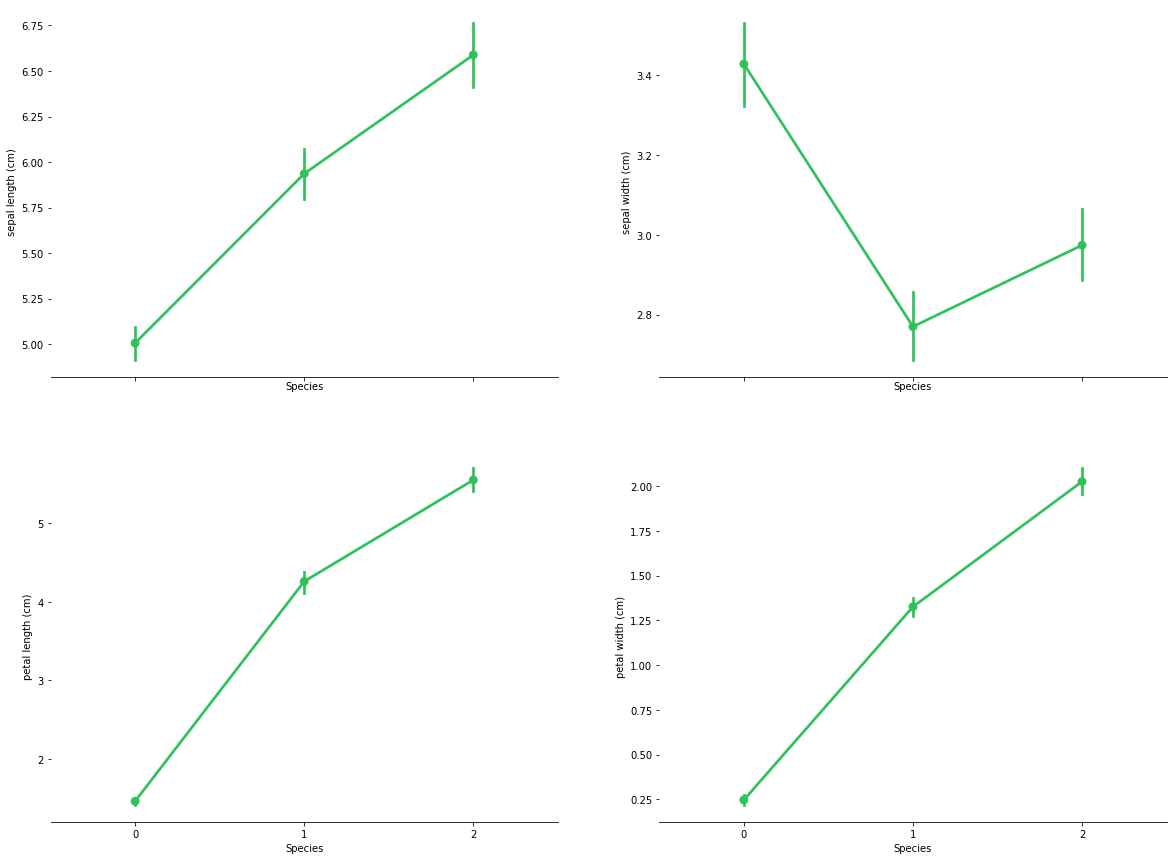

In [34]:
#! 观察个特征与品种之间的关系
f, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
sns.despine(left=True)
sns.pointplot(x='Species', y=df.columns[0], data=df, color=antV[1], ax=axes[0, 0])
sns.pointplot(x='Species', y=df.columns[1], data=df, color=antV[1], ax=axes[0, 1])
sns.pointplot(x='Species', y=df.columns[2], data=df, color=antV[1], ax=axes[1, 0])
sns.pointplot(x='Species', y=df.columns[3], data=df, color=antV[1], ax=axes[1, 1])
plt.show()

>点图中的点为这组数据的平均值点，竖线为误差棒，默认2个均值点会相连接。若不想显示，参数join=False

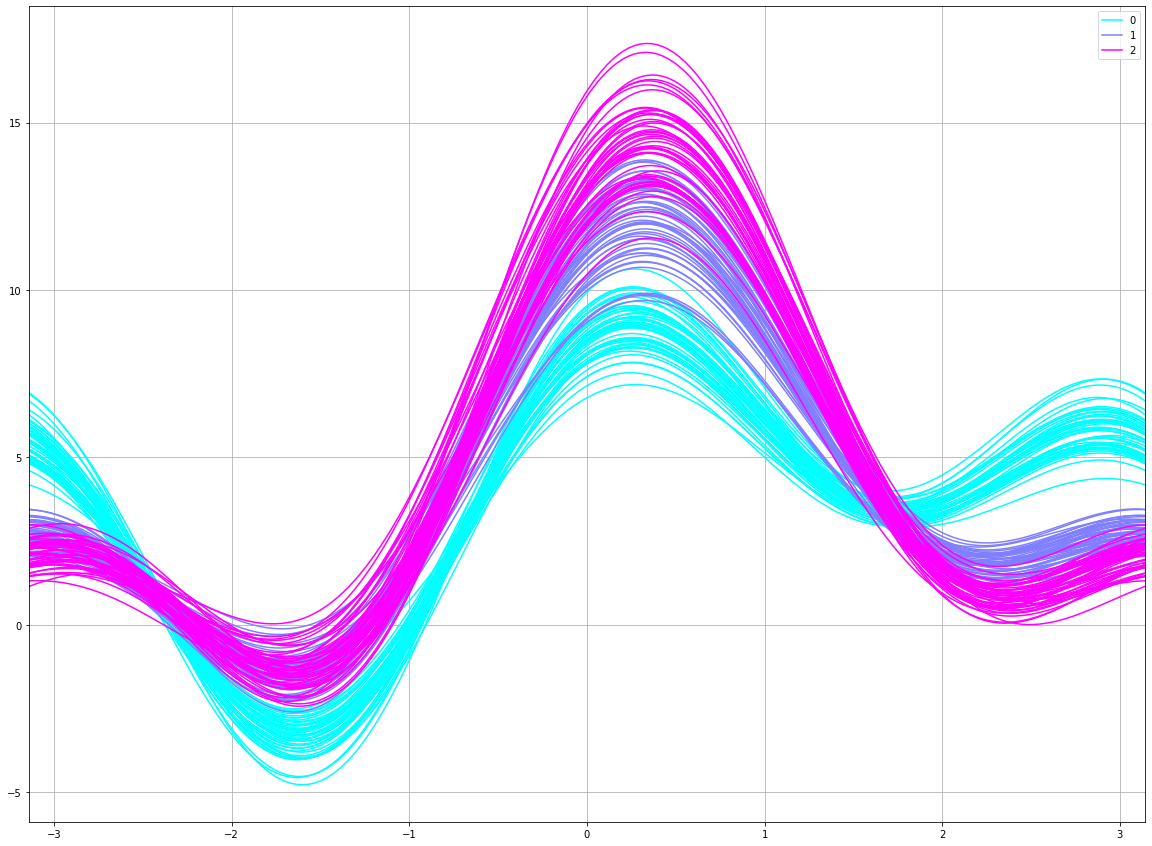

In [35]:
plt.subplots(figsize = (20,15))
plotting.andrews_curves(df, 'Species', colormap='cool')

plt.show()

>Andrews Curves 将每个花类的每个特征(这里是4个特征)观测值转换为曲线并表示傅里叶级数的系数，用于检测时间序列数据中的异常值

In [36]:
target = np.unique(data.target) #? 该函数是去除数组中的重复数字，并进行排序之后输出
target_names = np.unique(data.target_names)
targets = dict(zip(target,target_names))    #?在key值有重复的情况下，字典中的值，将会使用列表中对应的最后一个值作为value
df['Species'] = df['Species'].replace(targets)

#### 描述
>Python replace() 方法把字符串中的 old（旧字符串） 替换成 new(新字符串)，如果指定第三个参数max，则替换不超过 max 次。
#### 语法
replace()方法语法：
```
str.replace(old, new[, max])
```
#### 参数
- old -- 将被替换的子字符串
- new -- 新字符串，用于替换old子字符串
- max -- 可选字符串, 替换不超过 max 次
#### 返回值
>返回字符串中的 old（旧字符串） 替换成 new(新字符串)后生成的新字符串，如果指定第三个参数max，则替换不超过 max 次。

## 训练数据集

In [37]:
x = df.drop(columns='Species')
y = df['Species']
feature_names = x.columns
labels = y.unique()
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state = 42)
model = DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

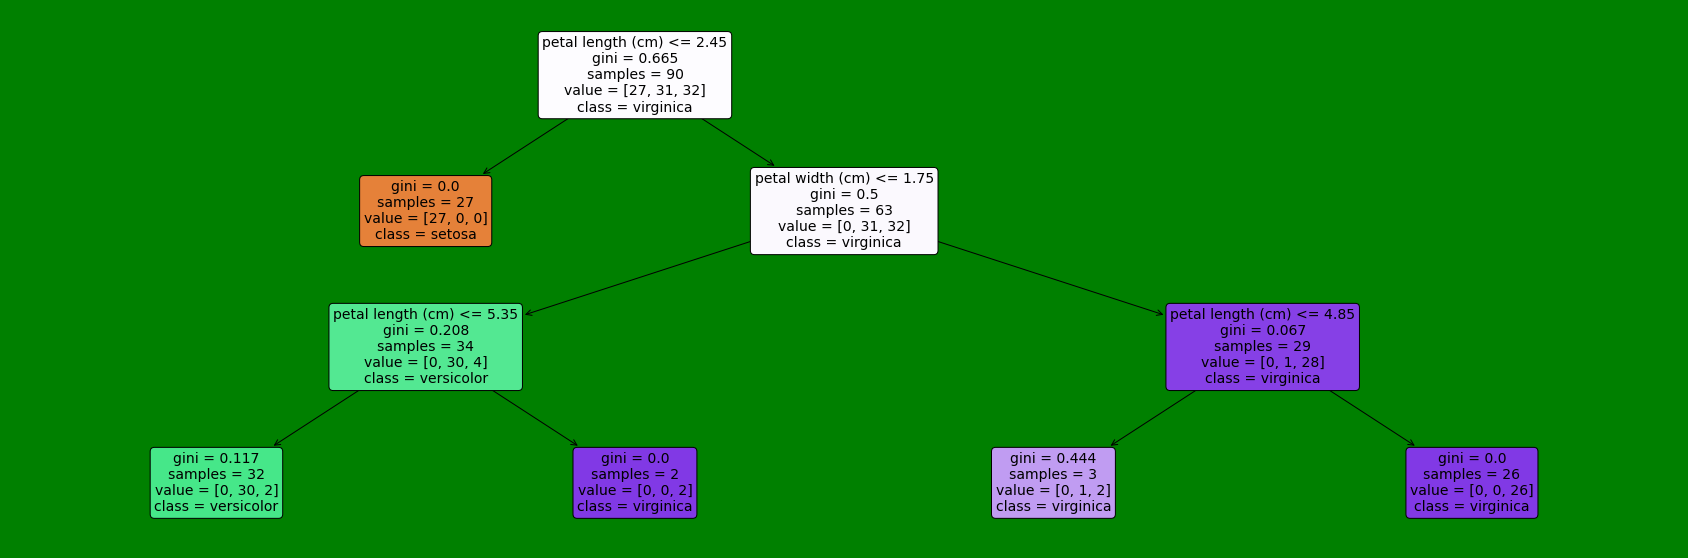

In [38]:
plt.figure(figsize=(30,10),facecolor='g')
a = tree.plot_tree(model,feature_names=feature_names,class_names=labels,rounded=True,filled=True,fontsize=14)
plt.show()